#📌 Extração

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/df_limpo.csv')
df.head()

,ID_Cliente,Churn,Cliente_Genero,Cliente_CidadaoSenior,Cliente_Parceiro,Cliente_Dependentes,Cliente_MesesContrato,Telefone_ServicoTelefone,Telefone_MultiplasLinhas,Internet_ServicoInternet,...,Internet_ProtecaoDispositivo,Internet_SuporteTecnico,Internet_StreamingTV,Internet_StreamingFilmes,Conta_Contrato,Conta_FaturaOnline,Conta_MetodoPagamento,Total.Dia,Conta_CobrancasMensais,Conta_CobrancasTotais
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.9,267.40


In [69]:
df.columns

Index(['ID_Cliente', 'Churn', 'Cliente_Genero', 'Cliente_CidadaoSenior',
       'Cliente_Parceiro', 'Cliente_Dependentes', 'Cliente_MesesContrato',
       'Telefone_ServicoTelefone', 'Telefone_MultiplasLinhas',
       'Internet_ServicoInternet', 'Internet_SegurancaOnline',
       'Internet_BackupOnline', 'Internet_ProtecaoDispositivo',
       'Internet_SuporteTecnico', 'Internet_StreamingTV',
       'Internet_StreamingFilmes', 'Conta_Contrato', 'Conta_FaturaOnline',
       'Conta_MetodoPagamento', 'Total.Dia', 'Conta_CobrancasMensais',
       'Conta_CobrancasTotais'],
      dtype='object')

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID_Cliente                    7043 non-null   object 
 1   Churn                         7043 non-null   object 
 2   Cliente_Genero                7043 non-null   object 
 3   Cliente_CidadaoSenior         7043 non-null   int64  
 4   Cliente_Parceiro              7043 non-null   object 
 5   Cliente_Dependentes           7043 non-null   object 
 6   Cliente_MesesContrato         7043 non-null   int64  
 7   Telefone_ServicoTelefone      7043 non-null   object 
 8   Telefone_MultiplasLinhas      7043 non-null   object 
 9   Internet_ServicoInternet      7043 non-null   object 
 10  Internet_SegurancaOnline      7043 non-null   object 
 11  Internet_BackupOnline         7043 non-null   object 
 12  Internet_ProtecaoDispositivo  7043 non-null   object 
 13  Int

#🛠️ Preparação dos Dados

✔️ Remoção de colunas irrelevantes

Na etapa de remoção de colunas irrelevantes, o objetivo é excluir variáveis que:


*   Não têm valor preditivo (ex: identificadores únicos).
*   São reduntantes com outras.
*   Podem causar vazamento de dados (data leakage).

In [71]:
df = df.drop(columns=['ID_Cliente'])

In [72]:
df_clean = df.copy()

cols_to_fix = [
    'Internet_SegurancaOnline', 'Internet_BackupOnline', 'Internet_ProtecaoDispositivo',
    'Internet_SuporteTecnico', 'Internet_StreamingTV', 'Internet_StreamingFilmes'
]

for col in cols_to_fix:
    df_clean[col] = df_clean[col].replace('No internet service', 'No')

categorical_cols = [
       'Churn', 'Cliente_Genero', 'Cliente_Parceiro', 'Cliente_Dependentes',
       'Telefone_ServicoTelefone', 'Telefone_MultiplasLinhas', 'Internet_ServicoInternet',
       'Internet_SegurancaOnline', 'Internet_BackupOnline',
       'Internet_ProtecaoDispositivo', 'Internet_SuporteTecnico',
       'Internet_StreamingTV', 'Internet_StreamingFilmes', 'Conta_Contrato',
       'Conta_FaturaOnline', 'Conta_MetodoPagamento'
]

df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

df_encoded

,Cliente_CidadaoSenior,Cliente_MesesContrato,Total.Dia,Conta_CobrancasMensais,Conta_CobrancasTotais,Churn_Yes,Cliente_Genero_Male,Cliente_Parceiro_Yes,Cliente_Dependentes_Yes,Telefone_ServicoTelefone_Yes,...,Internet_ProtecaoDispositivo_Yes,Internet_SuporteTecnico_Yes,Internet_StreamingTV_Yes,Internet_StreamingFilmes_Yes,Conta_Contrato_One year,Conta_Contrato_Two year,Conta_FaturaOnline_Yes,Conta_MetodoPagamento_Credit card (automatic),Conta_MetodoPagamento_Electronic check,Conta_MetodoPagamento_Mailed check
0,0,9,2.20,65.60,593.30,False,False,True,True,True,...,False,True,True,False,True,False,True,False,False,True
1,0,9,2.01,59.90,542.40,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0,4,2.34,73.90,280.85,True,True,False,False,True,...,True,False,False,False,False,False,True,False,True,False
3,1,13,3.17,98.00,1237.85,True,True,True,False,True,...,True,False,True,True,False,False,True,False,True,False
4,1,3,2.97,83.90,267.40,True,False,True,False,True,...,False,True,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,13,1.90,55.15,742.90,False,False,False,False,True,...,False,True,False,False,True,False,False,False,False,True
7039,0,22,2.84,85.10,1873.70,True,True,True,False,True,...,False,False,False,True,False,False,True,False,True,False
7040,0,2,1.55,50.30,92.75,False,True,False,False,True,...,False,False,False,False,False,False,True,False,False,True
7041,0,67,2.30,67.85,4627.65,False,True,True,True,True,...,True,True,False,True,False,True,False,False,False,True


In [73]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Cliente_CidadaoSenior                          7043 non-null   int64  
 1   Cliente_MesesContrato                          7043 non-null   int64  
 2   Total.Dia                                      7032 non-null   float64
 3   Conta_CobrancasMensais                         7043 non-null   float64
 4   Conta_CobrancasTotais                          7032 non-null   float64
 5   Churn_Yes                                      7043 non-null   bool   
 6   Cliente_Genero_Male                            7043 non-null   bool   
 7   Cliente_Parceiro_Yes                           7043 non-null   bool   
 8   Cliente_Dependentes_Yes                        7043 non-null   bool   
 9   Telefone_ServicoTelefone_Yes                   7043 

✔️ Verificação dos valores nulos

In [74]:
df_encoded.isnull().sum()

,0
Cliente_CidadaoSenior,0
Cliente_MesesContrato,0
Total.Dia,11
Conta_CobrancasMensais,0
Conta_CobrancasTotais,11
Churn_Yes,0
Cliente_Genero_Male,0
Cliente_Parceiro_Yes,0
Cliente_Dependentes_Yes,0
Telefone_ServicoTelefone_Yes,0


In [75]:
print(df_encoded[['Total.Dia', 'Conta_CobrancasTotais']].isnull().sum())

Total.Dia                11
Conta_CobrancasTotais    11
dtype: int64


In [76]:
df_encoded = df_encoded.dropna(subset=['Total.Dia', 'Conta_CobrancasTotais'])

In [77]:
df_encoded.isnull().sum()

,0
Cliente_CidadaoSenior,0
Cliente_MesesContrato,0
Total.Dia,0
Conta_CobrancasMensais,0
Conta_CobrancasTotais,0
Churn_Yes,0
Cliente_Genero_Male,0
Cliente_Parceiro_Yes,0
Cliente_Dependentes_Yes,0
Telefone_ServicoTelefone_Yes,0


## ≡ Correlação entre as variáveis

In [78]:
corr = df_encoded.corr()

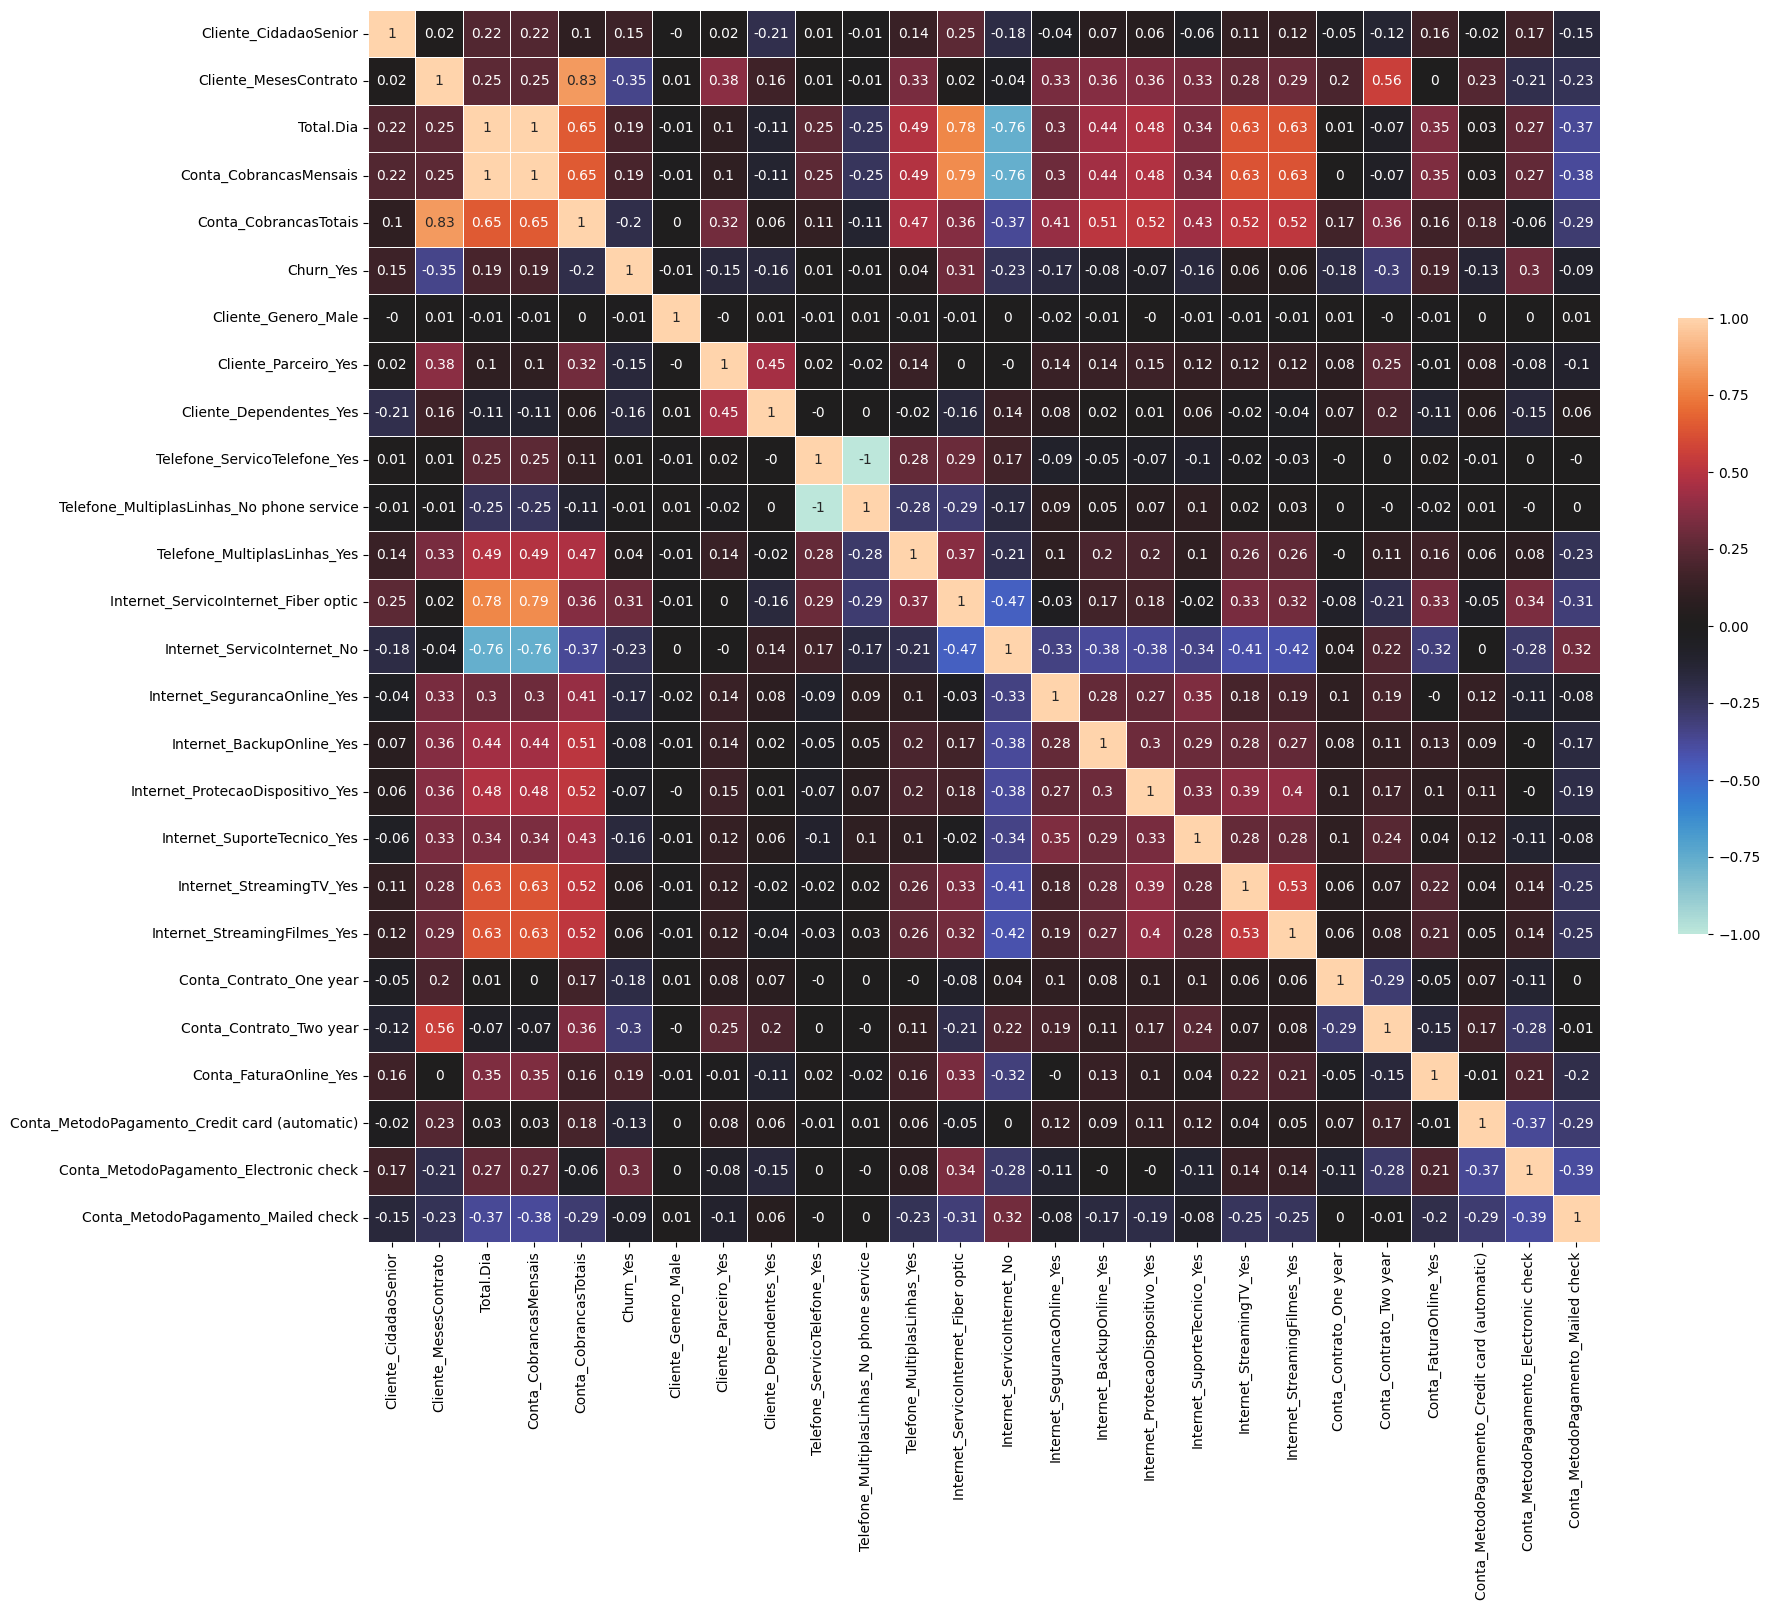

In [79]:
import numpy as np

fig, ax = plt.subplots(figsize=(20,16))
ax = sns.heatmap(np.round(corr, 2), vmax=1, vmin=-1, center=0,
                 square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})
plt.show()

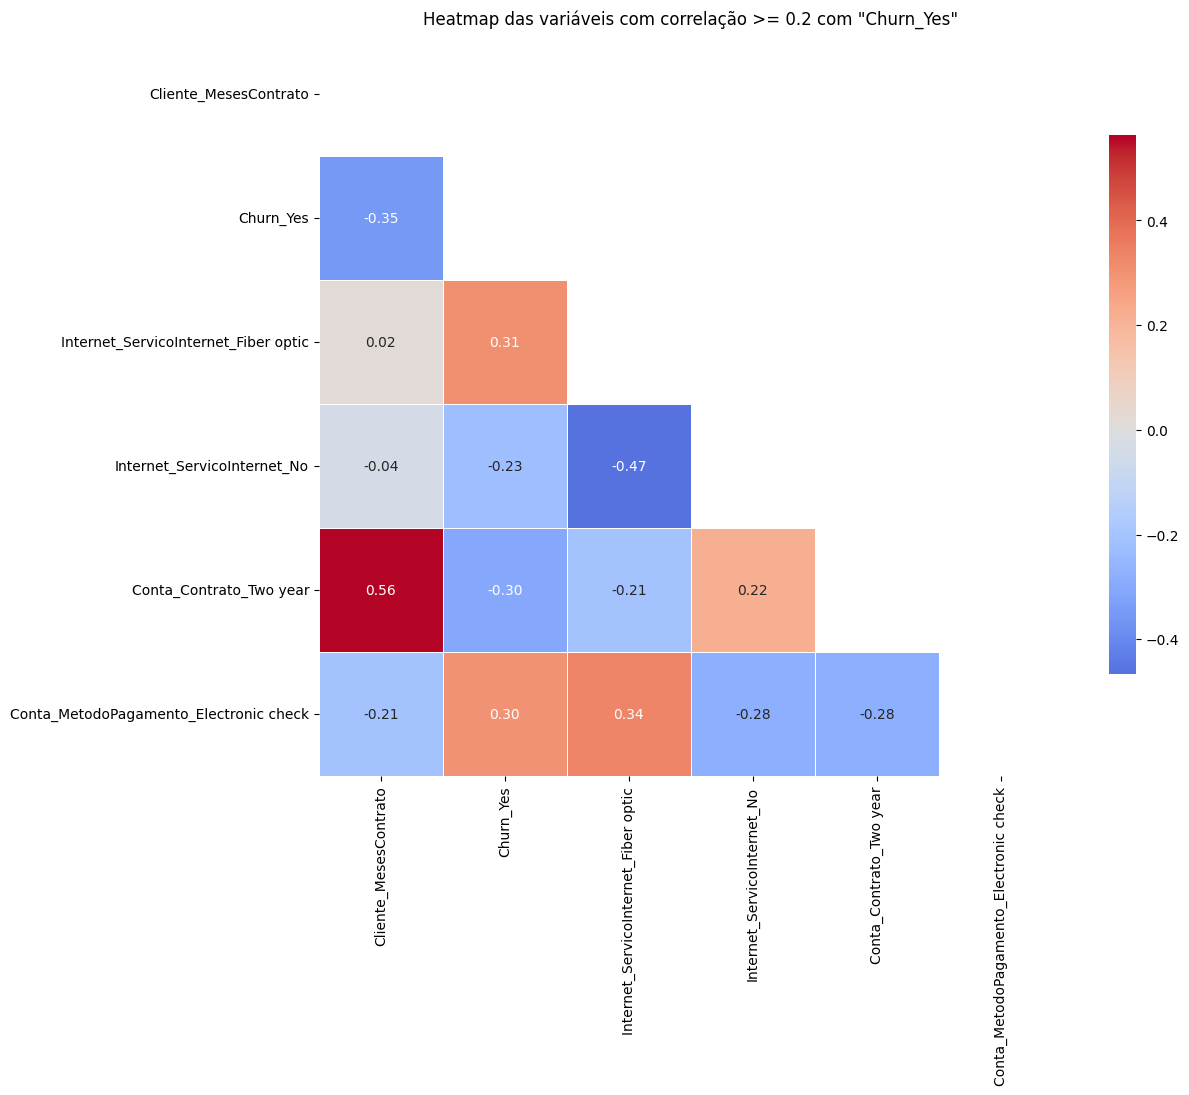

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

target_var = 'Churn_Yes'

limiar = 0.2

variaveis_relevantes = corr.index[abs(corr[target_var]) >= limiar].tolist()

if target_var not in variaveis_relevantes:
    variaveis_relevantes.append(target_var)

corr_filtrada = corr.loc[variaveis_relevantes, variaveis_relevantes]

mascara = np.triu(np.ones_like(corr_filtrada, dtype=bool))

plt.figure(figsize=(12,10))
sns.heatmap(
    corr_filtrada,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7},
    mask=mascara
)
plt.title(f'Heatmap das variáveis com correlação >= {limiar} com "{target_var}"')
plt.show()

## 🔍 Análise de Multicolinearidade

In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [82]:
X = df_encoded.drop(columns=['Churn_Yes'])

In [83]:
X_const = add_constant(X)

In [84]:
X_const = X_const.astype(float)

vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

display(vif_data.sort_values(by='VIF', ascending=False))

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
9,Telefone_ServicoTelefone_Yes,inf
10,Telefone_MultiplasLinhas_No phone service,inf
4,Conta_CobrancasMensais,992.623632
12,Internet_ServicoInternet_Fiber optic,148.504277
3,Total.Dia,133.792125
13,Internet_ServicoInternet_No,104.217179
19,Internet_StreamingFilmes_Yes,24.158588
18,Internet_StreamingTV_Yes,24.080021
5,Conta_CobrancasTotais,10.871350
2,Cliente_MesesContrato,7.613525


**VIF REFEITA**

In [85]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

X_filtered = X_const.copy()

cols_to_drop = [
    "Telefone_ServicoTelefone_Yes",               # Altamente colinear com "MultipleLines"
    "Telefone_MultiplasLinhas_No phone service"  # Redundante com ausência de telefone
]

X_filtered.drop(columns=cols_to_drop, inplace=True)

X_filtered.drop(columns=["Total.Dia"], inplace=True)

X_filtered.drop(columns=["Internet_ServicoInternet_No"], inplace=True)

X_filtered = X_filtered.astype(float)

vif_data = pd.DataFrame()
vif_data["feature"] = X_filtered.columns
vif_data["VIF"] = [variance_inflation_factor(X_filtered.values, i) for i in range(X_filtered.shape[1])]

display(vif_data.sort_values(by="VIF", ascending=False))

,feature,VIF
0,const,36.498367
3,Conta_CobrancasMensais,18.168780
4,Conta_CobrancasTotais,10.706800
2,Cliente_MesesContrato,7.548716
9,Internet_ServicoInternet_Fiber optic,6.997820
17,Conta_Contrato_Two year,2.532131
14,Internet_StreamingTV_Yes,2.188547
15,Internet_StreamingFilmes_Yes,2.187888
20,Conta_MetodoPagamento_Electronic check,1.967305
21,Conta_MetodoPagamento_Mailed check,1.847752


**VIF FINAL**

In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X_final = X_filtered.drop(columns=["Conta_CobrancasTotais"])

vif_data_final = pd.DataFrame()
vif_data_final["feature"] = X_final.columns
vif_data_final["VIF"] = [variance_inflation_factor(X_final.values, i) for i in range(X_final.shape[1])]

display(vif_data_final.sort_values(by="VIF", ascending=False))

,feature,VIF
0,const,29.602764
3,Conta_CobrancasMensais,17.283226
8,Internet_ServicoInternet_Fiber optic,6.936112
2,Cliente_MesesContrato,2.826197
16,Conta_Contrato_Two year,2.521228
13,Internet_StreamingTV_Yes,2.166619
14,Internet_StreamingFilmes_Yes,2.163842
19,Conta_MetodoPagamento_Electronic check,1.964004
20,Conta_MetodoPagamento_Mailed check,1.825717
12,Internet_SuporteTecnico_Yes,1.712098


## 🤖 Modelos Preditivos

In [120]:
#Importação das bibliotecas
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report

In [88]:
#Separação das variáveis
X = df_encoded.drop(columns=['Churn_Yes']) #explicativas
y = df_encoded['Churn_Yes'] #alvo

📌 Verificação da Proporção de Evasão

In [89]:
#Calculando a proporção de clientes que evadiram em relação aos que permaneceram ativos, para avaliar se há desequilíbrio entre as classes.
y.value_counts(normalize=True)

,proportion
Churn_Yes,
False,0.734215
True,0.265785


#####Foi detectado um desequilíbrio entre as classes, onde a classe minoritária representa menos de 30% dos dados.
-----------------------------------------------------------------------

📌Dividindo os dados entre treino e teste

Para compreender se o modelo está de fato aprendendo com os dados, precisamos fazer uma separação dos dados entre treinamento e teste. Os dados de treinamento são usados para ajustar o modelo, enquanto os dados de teste servem para verificar o aprendizado do modelo em dados que não foram utilizados no momento do ajuste.

In [90]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

📌Modelo Base

O modelo mais simples de classificar os dados é simplesmente utilizar um algoritmo que chuta todas as classificações para a classe que tem maior frequência. Esse algoritmo serve como um critério de comparação, para identificar se os outros modelos tem um desempenho melhor do que a classificação mais simples possível.

In [91]:
from sklearn.dummy import DummyClassifier

In [92]:
model_dummy = DummyClassifier()
model_dummy.fit(X_train, y_train)

model_dummy.score(X_test, y_test)

0.7341232227488151

📌Balanceamento de classes

In [93]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

**Modelo Árvore de Decisão**

In [94]:
#Treinar o modelo
arvore = DecisionTreeClassifier(max_depth=3, random_state=5)
arvore.fit(X_train_bal, y_train_bal)

DecisionTreeClassifier(max_depth=3, random_state=5)

In [95]:
arvore.score(X_train, y_train)

0.7596505485574969

In [96]:
arvore.score(X_test, y_test)

0.7393364928909952

*A diferença entre treino e teste é pequena, sugerindo que a árvore está capturando padrões reais dos dados, sem memorizar demais.*

**Modelo KNN**

*Antes de treinar o modelo KNN vamos normalizar os dados para que fiquem em uma mesma escala, a fim de que o algoritmo não seja influenciado incorretamente pelos valores numéricos divergentes entre as variáveis.*

In [97]:
normalizacao = MinMaxScaler()
x_treino_normalizado = normalizacao.fit_transform(X_train_bal)
x_teste_normalizado = normalizacao.transform(X_test)

In [98]:
#Ttreinar o modelo
knn = KNeighborsClassifier()
knn.fit(x_treino_normalizado, y_train_bal)

KNeighborsClassifier()

In [99]:
knn.score(x_treino_normalizado, y_train_bal)

0.8634477033757609

In [100]:
knn.score(x_teste_normalizado, y_test)

0.7270142180094786

📌Avaliação dos Modelos

**Matriz de Confusão**

In [101]:
#Matriz de Confusão - Modelo Dummy
y_pred_dummy = model_dummy.predict(X_test)
cm_dummy = confusion_matrix(y_test, y_pred_dummy)
print(cm_dummy)

[[1549    0]
 [ 561    0]]


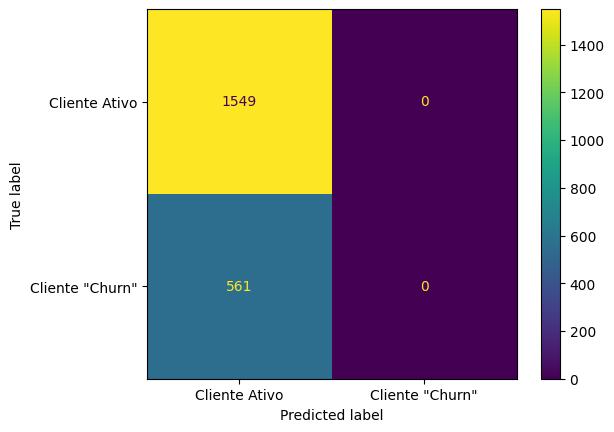

In [102]:
#Visualização Matriz de Confusão - Modelo Dummy
disp_dummy = ConfusionMatrixDisplay(confusion_matrix=cm_dummy, display_labels=['Cliente Ativo', 'Cliente "Churn"'])
disp_dummy.plot()
plt.show()

*No modelo base, ele não é capaz de identificar os clientes "Churn", pois este não é o seu papel. Ele servirá apenas como referência para os modelos mais complexos.*

In [103]:
#Matriz de confusão - Modelo Árvore
y_pred_arvore = arvore.predict(X_test)
cm_arvore = confusion_matrix(y_test, y_pred_arvore)
print(cm_arvore)

[[1201  348]
 [ 202  359]]


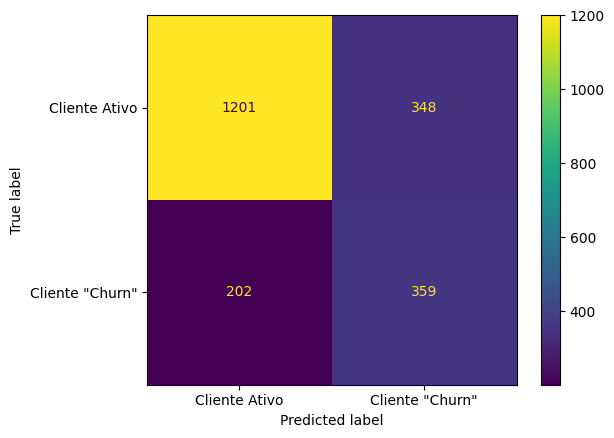

In [104]:
#Visualização Matriz de Confusão - Modelo Árvore
disp_arvore = ConfusionMatrixDisplay(confusion_matrix=cm_arvore, display_labels=['Cliente Ativo', 'Cliente "Churn"'])
disp_arvore.plot()
plt.show()

*Neste modelo, podemos identificar que ele está acertado mais os clientes "Churn". Ao todo são 359 clientes que realmente evadiram os serviços da TelecomX.*

In [105]:
#Matriz de confusão - Modelo KNN
y_pred_knn = knn.predict(x_teste_normalizado)
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)

[[1158  391]
 [ 185  376]]


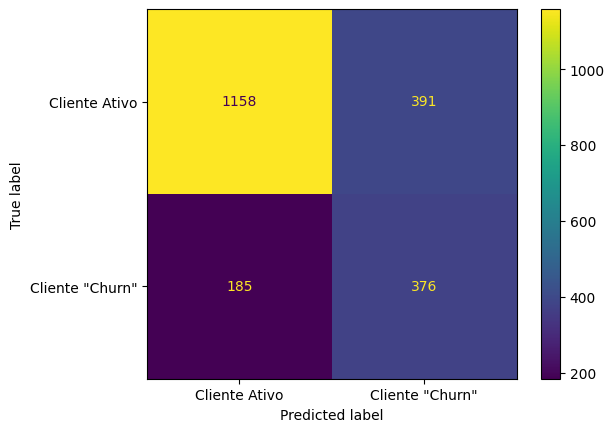

In [106]:
#Visualização Matriz de Confusão - Modelo KNN
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=['Cliente Ativo', 'Cliente "Churn"'])
disp_knn.plot()
plt.show()

*Neste outro modelo, podemos notar que também ele está prevendo os clientes que irão evadir os serviços da TelecomX. Neste caso, este modelo identificou 376 clientes "Churn".

**Métricas de Avaliação**

In [107]:
y_dummy = model_dummy.predict(X_test)
y_arvore = arvore.predict(X_test)
y_knn = knn.predict(x_teste_normalizado)

resumo = {
    'Modelo': ['Dummy', 'Árvore', 'KNN'],
    'Acurácia': [
        accuracy_score(y_test, y_dummy),
        accuracy_score(y_test, y_arvore),
        accuracy_score(y_test, y_knn)
    ],
    'Precisão': [
        precision_score(y_test, y_dummy, zero_division=0),
        precision_score(y_test, y_arvore),
        precision_score(y_test, y_knn)
    ],
    'Recall': [
        recall_score(y_test, y_dummy, zero_division=0),
        recall_score(y_test, y_arvore),
        recall_score(y_test, y_knn)
    ],
    'F1 Score': [
        f1_score(y_test, y_dummy, zero_division=0),
        f1_score(y_test, y_arvore),
        f1_score(y_test, y_knn)
    ]
}

df_resultados = pd.DataFrame(resumo)
print(df_resultados.round(2))

   Modelo  Acurácia  Precisão  Recall  F1 Score
0   Dummy      0.73      0.00    0.00      0.00
1  Árvore      0.74      0.51    0.64      0.57
2     KNN      0.73      0.49    0.67      0.57


Neste relatório das métricas de avaliação podemos fazer algumas considerações:

1. O modelo Dummy serve apenas como baseline.
2. No modelo Árvore de Decisão, tanto a acurácia, quanto a precisão são melhores que os demais modelos.
3. No modelo KNN ele se sobressai em relação ao modelo da Árvore de Decisão, em relação ao Recall, que no nosso caso, é a métrica que leva em consideração os valores positivos reais. Ele é usada quando o risco ou custo de classificar falsos negativos é alta, podendo causar prejuízos reais para a empresa.

**Curva ROC**

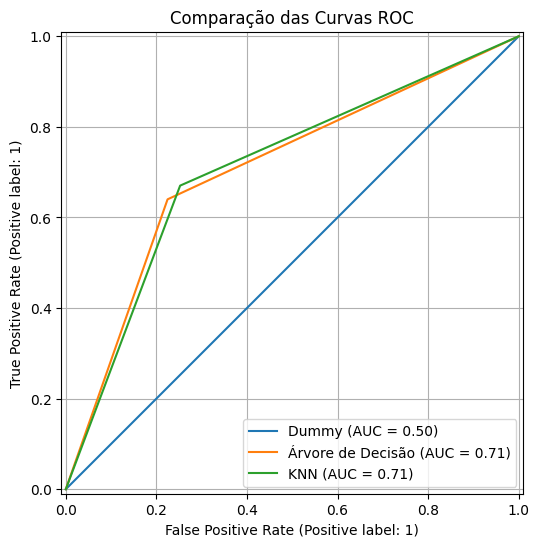

In [108]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))

RocCurveDisplay.from_predictions(y_test, y_dummy, name='Dummy', ax=ax)
RocCurveDisplay.from_predictions(y_test, y_arvore, name='Árvore de Decisão', ax=ax)
RocCurveDisplay.from_predictions(y_test, y_knn, name='KNN', ax=ax)

plt.title('Comparação das Curvas ROC')
plt.grid(True)
plt.show()

In [114]:
print(f'AUC: {roc_auc_score(y_test, y_dummy):.2f}')
print(f'AUC: {roc_auc_score(y_test, y_arvore):.2f}')
print(f'AUC: {roc_auc_score(y_test, y_knn):.2f}')

AUC: 0.50
AUC: 0.71
AUC: 0.71


Levando em consideração que na análise da Curva ROC, ela avalia se o nosso modelo está diferenciando bem uma classe da outra, ou seja, clientes "Ativos" de clientes "Churn", podemos notar que tanto o modelo Árvore de Decisão, quanto o modelo KNN, estão se saindo bem neste critério. Ambos os modelos estão acima da curva diagonal, do modelo base, e a métrica extraída da Curva ROC o AUC, é de 0,71. Dessa forma, tanto o modelo Árvore de Decisão, quanto o modelo KNN são boas escolhas.

**Curva de Precisão x Recall**

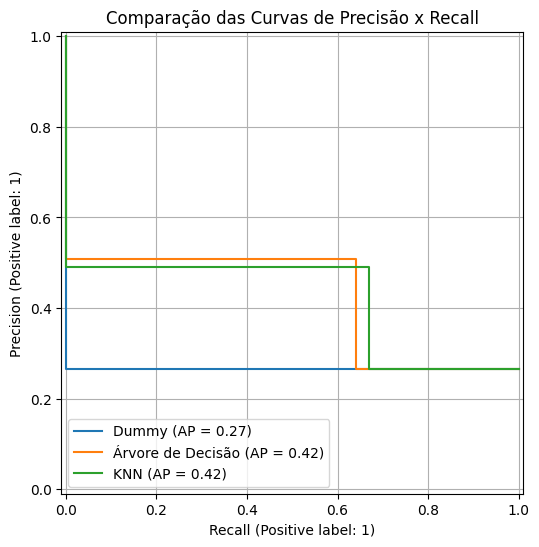

In [116]:
fig, ax = plt.subplots(figsize=(8, 6))

PrecisionRecallDisplay.from_predictions(
    y_test, y_dummy, name='Dummy', ax=ax)

PrecisionRecallDisplay.from_predictions(
    y_test, y_arvore, name='Árvore de Decisão', ax=ax)

PrecisionRecallDisplay.from_predictions(
    y_test, y_knn,name='KNN', ax=ax)

plt.title('Comparação das Curvas de Precisão x Recall')
plt.grid(True)
plt.show()

In [119]:
print(f'AP: {average_precision_score(y_test, y_dummy):.2f}')
print(f'AP: {average_precision_score(y_test, y_arvore):.2f}')
print(f'AP: {average_precision_score(y_test, y_knn):.2f}')

AP: 0.27
AP: 0.42
AP: 0.42


A curva de precisão x recall mede o desempenho para o conjunto de dados que estão muito desbalanceados, como é o nosso caso. Então neste caso, iremos explorar um equilíbrio em não perder clientes (precisão), e oferecer serviços para clientes que irão abandonar a TelecomX (recall), causando um prejuízo à empresa. Pela métrica da curva de precisão x recall, a Average Precision (AP), quanto mais próxima de 1, melhor será o desempenho do modelo, e se o mesmo estiver próximo de 0, pior será o modelo. No nosso caso, tanto o modelo Árvore de Decisão, quanto o modelo KNN, apresentaram o mesmo AP de 0,42, o que representa o desempenho mediano.

📌Relatório de Métricas

In [130]:
print("\033[1mRelatório de Métricas - Modelo Dummy:\033[0m")
print(classification_report(y_test, y_dummy,zero_division=0))
print(55*'-')

print("\033[1mRelatório de Métricas - Modelo Árvore de Decisão:\033[0m")
print(classification_report(y_test, y_arvore,zero_division=0))
print(55*'-')

print("\033[1mRelatório de Métricas - Modelo KNN:\033[0m")
print(classification_report(y_test, y_knn,zero_division=0))

Relatório de Métricas - Modelo Dummy:
              precision    recall  f1-score   support

       False       0.73      1.00      0.85      1549
        True       0.00      0.00      0.00       561

    accuracy                           0.73      2110
   macro avg       0.37      0.50      0.42      2110
weighted avg       0.54      0.73      0.62      2110

-------------------------------------------------------
Relatório de Métricas - Modelo Árvore de Decisão:
              precision    recall  f1-score   support

       False       0.86      0.78      0.81      1549
        True       0.51      0.64      0.57       561

    accuracy                           0.74      2110
   macro avg       0.68      0.71      0.69      2110
weighted avg       0.76      0.74      0.75      2110

-------------------------------------------------------
Relatório de Métricas - Modelo KNN:
              precision    recall  f1-score   support

       False       0.86      0.75      0.80      1549
 

Tanto o modelo Árvore de Decisão, quanto o modelo KNN apresentaram praticamente o mesmo equilíbrio com o f1-score de 0,57. No entanto, o modelo KNN apresentou um melhor recall em relação ao modelo da Árvore de Decisão, o que representa uma certa vantagem, considerando que a empresa deve levar em consideração os verdadeiros positivos, ou seja, os clientes que irão abandonar os serviços da TelecomX, causando prejuízo para a mesma. Portanto, por este relatório destas métricas, se tivermos que escolher um modelo, seria melhor optar pelo modelo KNN.

📌Análise de Importância das Variáveis

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


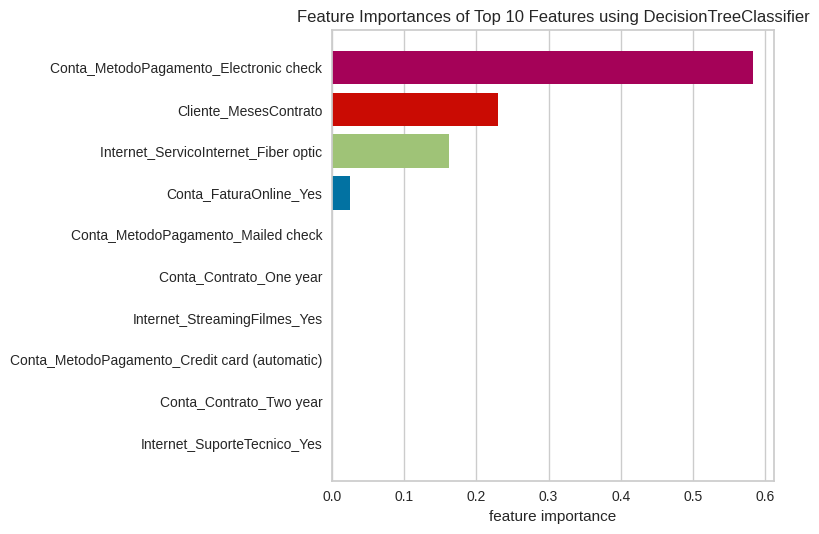

In [146]:
from yellowbrick.model_selection import FeatureImportances

x_treino_balanceado = pd.DataFrame(X_train_bal, columns = X.columns)

viz = FeatureImportances(arvore, relative=False, topn=10)
viz.fit(x_treino_balanceado, y_train_bal)
viz.show()

plt.show()

In [147]:
importancias = pd.Series(arvore.feature_importances_, index=X.columns)
print(importancias.sort_values(ascending=False).head(10))

Conta_MetodoPagamento_Electronic check    0.583214
Cliente_MesesContrato                     0.230351
Internet_ServicoInternet_Fiber optic      0.161996
Conta_FaturaOnline_Yes                    0.024439
Cliente_CidadaoSenior                     0.000000
Cliente_Genero_Male                       0.000000
Total.Dia                                 0.000000
Conta_CobrancasMensais                    0.000000
Conta_CobrancasTotais                     0.000000
Telefone_ServicoTelefone_Yes              0.000000
dtype: float64


In [148]:
from sklearn.inspection import permutation_importance

resultado = permutation_importance(knn, x_teste_normalizado, y_test, n_repeats=10, random_state=5)

importancias = pd.Series(resultado.importances_mean, index=X.columns)
print(importancias.sort_values(ascending=False).head(10))

Cliente_MesesContrato                     0.019384
Conta_MetodoPagamento_Electronic check    0.016209
Conta_CobrancasTotais                     0.015308
Conta_Contrato_Two year                   0.012370
Conta_Contrato_One year                   0.012227
Internet_ServicoInternet_No               0.011232
Internet_SegurancaOnline_Yes              0.009384
Conta_FaturaOnline_Yes                    0.007204
Conta_CobrancasMensais                    0.007062
Cliente_CidadaoSenior                     0.006256
dtype: float64


Tanto MesesContrato quanto MetodoPagamento_Eletronic check ainda continuam relevantes neste modelo, como o modelo da Árvore de Decisão.
Com a normalização e o balanceamento, o KNN está captando alguns padrões similares aos da Árvore de Decisão, e também outros como CobrancasTotais e Conta_Contrato.

#📄Relatorio Final

🎯Objetivo

O objetivo deste estudo foi identificar os principais fatores que influenciam a evasão de clientes (churn) na empresa TelecomX, utilizando modelos de machine learning e técnicas de interpretação de variáveis.

📌Metodologia

Para este trabalho foram aplicados os seguintes modelos de classificação:
- Árvore de Decisão
- K-nearest neighbors (KNN)



📌Principais fatores que influenciam a evasão de clientes

1. Tipo de Contrato
- Clientes com contratos de um ano ou dois anos tendem a permanecer mais tempo.
- Clientes com contratos mensal tem forte associação com a evasão.

2. Forma de Pagamento
- Pagamentos via Mailed check e Electronic check estão mais associados com a evasão.

3. Serviços de Internet
- Clientes com Fiber optic apresentam maior taxa de evasão.
- DSL está mais associado à permanência.


📌Estratégias para minimizar a evasão dos clientes

1. Incentivar contratos de longo prazo para reter e fidelizar os clientes.

2. Melhorar a experiência do cliente com relação aos meios de pagamento, propondo novas formas de pagamento que contribua com a satisfação do cliente.
3. Monitorar os serviços de Internet que estão comprometendo a jornada do cliente.

📌Conclusão

Este trabalho revelou que os principais motivos para a evasão dos clientes estão associados com o tipo de contrato, a forma de pagamento, e os serviços de Internet oferecidos pela TelecomX. Neste caso, recomenda-se que a TelecomX adote estratégias de retenção e fidelização dos seus clientes, priorizando os pontos relevantes demonstrados neste trabalho.